In [2]:
import datetime, pandas, dateutil

In [3]:
first_date = datetime.date(2020,4,2)

In [4]:
last_date = datetime.date.today()

In [5]:
def dates(date, last_date):
   while date <= last_date:
        yield date
        date += datetime.timedelta(days=1)
   return

In [6]:
def format_download(date):
    prefix = "https://www.england.nhs.uk/statistics/wp-content/uploads/sites/2/2020/"
    
    month = date.strftime("%m")
    monthname = date.strftime("%B")
    day_figure = str(int(date.strftime("%d")))
    date_dependent_part = f"{month}/COVID-19-daily-announced-deaths-{day_figure}-{monthname}-2020.xlsx"
    return prefix+date_dependent_part

In [7]:
download_strings = map(format_download, dates(first_date, last_date))

In [8]:
def url_to_dataframe(url):
    import urllib
    try:
        raw = pandas.read_excel(url,sheet_name = "COVID19 daily deaths by region")
    except urllib.error.HTTPError:
        return None
    dates_row = raw.index[raw['Unnamed: 1'].str.contains('NHS England').fillna(False)][0]
    dataframe = pandas.read_excel(url, header = dates_row + 1,index_col = 1, 
            sheet_name = "COVID19 daily deaths by region")
    def stabilise_date_datatype(content):
        try:
            return dateutil.parser.parse(content)
        except TypeError:
            return content
    return (dataframe.select_dtypes(include = ['object'])[dataframe.index.notnull()].
        fillna(0).rename(stabilise_date_datatype, axis='columns'))

In [9]:
dates_list = list(dates(first_date, last_date))
yesterday = dates_list[-2]

In [10]:
url_to_dataframe(format_download(first_date))

,2020-03-01,2020-03-15,2020-03-16,2020-03-17,2020-03-18,2020-03-19,2020-03-20,2020-03-21,2020-03-22,2020-03-23,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01
NHS England Region,,,,,,,,,,,,,,,,,,,
England,1,1,1,1,3,1,2,6,17,4,6,23,29,25,24,130,159,44,84
East Of England,0,0,0,0,0,0,0,2,0,0,0,4,7,4,2,12,14,4,8
London,0,0,0,0,2,0,0,1,7,1,2,11,11,5,9,31,54,13,15
Midlands,1,0,1,0,1,0,0,1,2,2,2,5,5,7,6,26,30,8,8
North East And Yorkshire,0,0,0,0,0,0,0,1,0,0,0,0,1,3,3,25,25,10,28
North West,0,0,0,0,0,1,1,1,6,0,0,0,2,3,3,18,15,4,14
South East,0,1,0,1,0,0,0,0,2,1,2,3,3,3,1,18,14,3,8
South West,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,7,2,3


In [24]:
url_to_dataframe(format_download(dates_list[1]))

,2020-03-09,2020-03-16,2020-03-19,2020-03-20,2020-03-21,2020-03-22,2020-03-23,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01,2020-04-02
NHS England Region,,,,,,,,,,,,,,,,,
England,1,2,1,3,8,5,5,15,13,10,23,29,62,102,59,179,87
East Of England,0,0,1,0,0,0,0,2,2,1,4,2,6,20,4,14,10
London,1,1,0,1,5,2,0,4,5,4,8,4,11,26,30,47,12
Midlands,0,1,0,1,0,3,2,6,1,2,7,10,20,26,11,46,14
North East And Yorkshire,0,0,0,1,1,0,1,0,0,0,1,1,7,6,2,16,26
North West,0,0,0,0,1,0,0,2,2,2,0,6,6,11,7,34,17
South East,0,0,0,0,0,0,0,0,1,0,2,2,8,11,1,11,5
South West,0,0,0,0,1,0,2,1,2,1,1,4,4,2,4,11,3


In [12]:
frames = pandas.concat(dict(map(lambda date:  [date, url_to_dataframe(format_download(date))], 
                                dates_list[:-1]))).fillna(0)

In [28]:
england = frames.xs('England',level=1)
england

,2020-03-01,2020-03-03,2020-03-09,2020-03-11,2020-03-15,2020-03-16,2020-03-17,2020-03-18,2020-03-19,2020-03-20,...,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01,2020-04-02,2020-04-03,2020-04-04,2020-04-05,2020-04-06
2020-04-02,1.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,2,...,24,130,159,44,84,0.0,0.0,0.0,0.0,0.0
2020-04-03,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,1.0,3,...,29,62,102,59,179,87.0,0.0,0.0,0.0,0.0
2020-04-04,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5,...,17,57,46,26,134,199.0,99.0,0.0,0.0,0.0
2020-04-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,...,7,25,29,19,51,114.0,181.0,97.0,0.0,0.0
2020-04-06,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3,...,2,5,7,5,14,25.0,70.0,188.0,69.0,0.0
2020-04-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,...,1,6,9,22,33,37.0,90.0,179.0,272.0,81.0


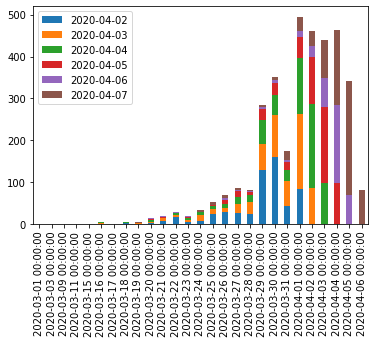

In [32]:
england.transpose().plot(kind='bar', stacked=True)